## Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

groceries = pd.read_csv("data\groceries.csv")
pd.set_option('display.max_rows', 100)
display(groceries)

,Items,Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,17,sausage,chicken,beef,hamburger meat,citrus fruit,grapes,root vegetables,whole milk,butter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9831,1,cooking chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9832,10,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9833,4,semi-finished bread,bottled water,soda,bottled beer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Clean

In [2]:
purchases_frequency_df = groceries["Items"].value_counts()
purchases_frequency_df = pd.DataFrame(pd.concat([pd.Series(purchases_frequency_df.index), 
                                                 pd.Series(purchases_frequency_df.values)], axis=1))
purchases_frequency_df.columns = ["Items Purchased", "Frequency"]

purchases_df = pd.DataFrame(groceries["Items"])
purchases_df.columns = ["Items Purchased"]

In [3]:
groceries = groceries.drop(columns="Items")
groceries = groceries.fillna("none")

## EDA

In [4]:
unique_items = []
items_frequency = []
for col in groceries:
    col_items = groceries[col].unique()
    all_items = groceries[col]
    for itm in col_items:
        unique_items.append(itm)
    for all_itms in all_items:
        items_frequency.append(all_itms)
unique_items = list(set(unique_items))
unique_items.remove("none")
print("Unique Items:", len(unique_items))

Unique Items: 169


In [5]:
items_frequency = pd.Series([val for val in items_frequency if val != "none"])
items_frequency = items_frequency.value_counts()

items_frequency_df = pd.DataFrame(pd.concat([pd.Series(items_frequency.index), pd.Series(items_frequency.values)], axis=1))
items_frequency_df.columns = ["Item", "Frequency"]

display(items_frequency)

whole milk               2513
other vegetables         1903
rolls/buns               1809
soda                     1715
yogurt                   1372
                         ... 
kitchen utensil             4
bags                        4
preservation products       2
sound storage medium        1
baby food                   1
Length: 169, dtype: int64

In [6]:
print(f"Total # of items purchased: {items_frequency.sum()}")
print(f"{items_frequency.index[0]} was purchased the most ({items_frequency.max()} purchases)")
print()

print(f"Mean # of times each item was purchased: {items_frequency.mean().round(0)}")
print(f"Stdandard Deviation of # of times each item was purchased: {items_frequency.std().round(0)}")
print()

print(f"Mean # of items purchased per customer: {purchases_df.mean()}")
print(f"Standard Deviation of # of items purchased per customer: {purchases_df.std()}")
print()

print(f"Min # of items purchased per customer: {purchases_df.min()}")
print(f"Max # of items purchased per customer: {purchases_df.max()}")

Total # of items purchased: 43367
whole milk was purchased the most (2513 purchases)

Mean # of times each item was purchased: 257.0
Stdandard Deviation of # of times each item was purchased: 379.0

Mean # of items purchased per customer: Items Purchased    4.409456
dtype: float64
Standard Deviation of # of items purchased per customer: Items Purchased    3.589385
dtype: float64

Min # of items purchased per customer: Items Purchased    1
dtype: int64
Max # of items purchased per customer: Items Purchased    32
dtype: int64


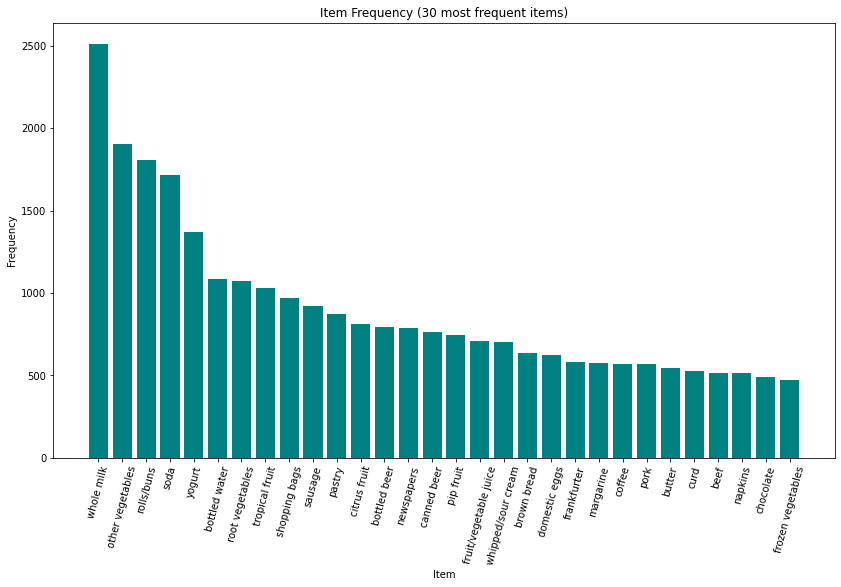

,Item,Frequency
0,whole milk,2513
1,other vegetables,1903
2,rolls/buns,1809
3,soda,1715
4,yogurt,1372
...,...,...
164,kitchen utensil,4
165,bags,4
166,preservation products,2
167,sound storage medium,1


In [7]:
plt.figure(figsize=(14,8))
plt.bar(items_frequency[:30].index, items_frequency[:30], color="teal")
plt.xticks(rotation=75)
plt.xlabel("Item")
plt.ylabel("Frequency")
plt.title("Item Frequency (30 most frequent items)")
plt.show()

display(items_frequency_df)

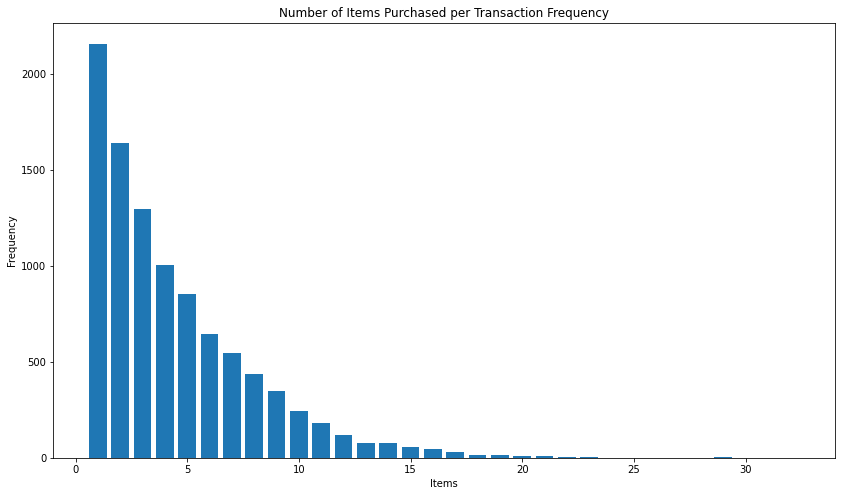

In [8]:
plt.figure(figsize=(14,8))
plt.bar(purchases_frequency_df["Items Purchased"], purchases_frequency_df["Frequency"])
plt.xlabel("Items")
plt.ylabel("Frequency")
plt.title("Number of Items Purchased per Transaction Frequency")
plt.show()

## Preprocess

In [9]:
groceries_list = groceries.values.tolist()
cleaned_list = []

for row in groceries_list:
    new_row = [val for val in row if val != "none"]
    cleaned_list.append(new_row)

In [10]:
from mlxtend.preprocessing import TransactionEncoder

enc = TransactionEncoder()
enc.fit(cleaned_list)
enc_groceries = pd.DataFrame(enc.transform(cleaned_list), columns=enc.columns_)
display(enc_groceries)

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
9831,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9832,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9833,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Model

In [11]:
from mlxtend.frequent_patterns import apriori, association_rules

itemset = apriori(enc_groceries, min_support=0.01, use_colnames=True)
display(itemset)

,support,itemsets
0,0.033452,(UHT-milk)
1,0.017692,(baking powder)
2,0.052466,(beef)
3,0.033249,(berries)
4,0.026029,(beverages)
...,...,...
328,0.011998,"(whole milk, tropical fruit, root vegetables)"
329,0.014540,"(whole milk, yogurt, root vegetables)"
330,0.010473,"(whole milk, yogurt, soda)"
331,0.015150,"(whole milk, yogurt, tropical fruit)"


In [12]:
rules = association_rules(itemset, metric="lift", min_threshold=2.25)
display(rules.head(10))

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(beef),(root vegetables),0.052466,0.108998,0.017387,0.331395,3.040367,0.011668,1.332628
1,(root vegetables),(beef),0.108998,0.052466,0.017387,0.159515,3.040367,0.011668,1.127366
2,(berries),(yogurt),0.033249,0.139502,0.010574,0.318043,2.279848,0.005936,1.261807
3,(yogurt),(berries),0.139502,0.033249,0.010574,0.075802,2.279848,0.005936,1.046043
4,(butter),(whipped/sour cream),0.055414,0.071683,0.010168,0.183486,2.559698,0.006196,1.136928
5,(whipped/sour cream),(butter),0.071683,0.055414,0.010168,0.141844,2.559698,0.006196,1.100716
6,(chicken),(root vegetables),0.042908,0.108998,0.010880,0.253555,2.326221,0.006203,1.193659
7,(root vegetables),(chicken),0.108998,0.042908,0.010880,0.099813,2.326221,0.006203,1.063215
8,(tropical fruit),(citrus fruit),0.104931,0.082766,0.019929,0.189922,2.294702,0.011244,1.132280
9,(citrus fruit),(tropical fruit),0.082766,0.104931,0.019929,0.240786,2.294702,0.011244,1.178942
